In [7]:
import pandas as pd
import numpy as np

In [8]:
housing=pd.read_csv('housing/housing.csv')

In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [12]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

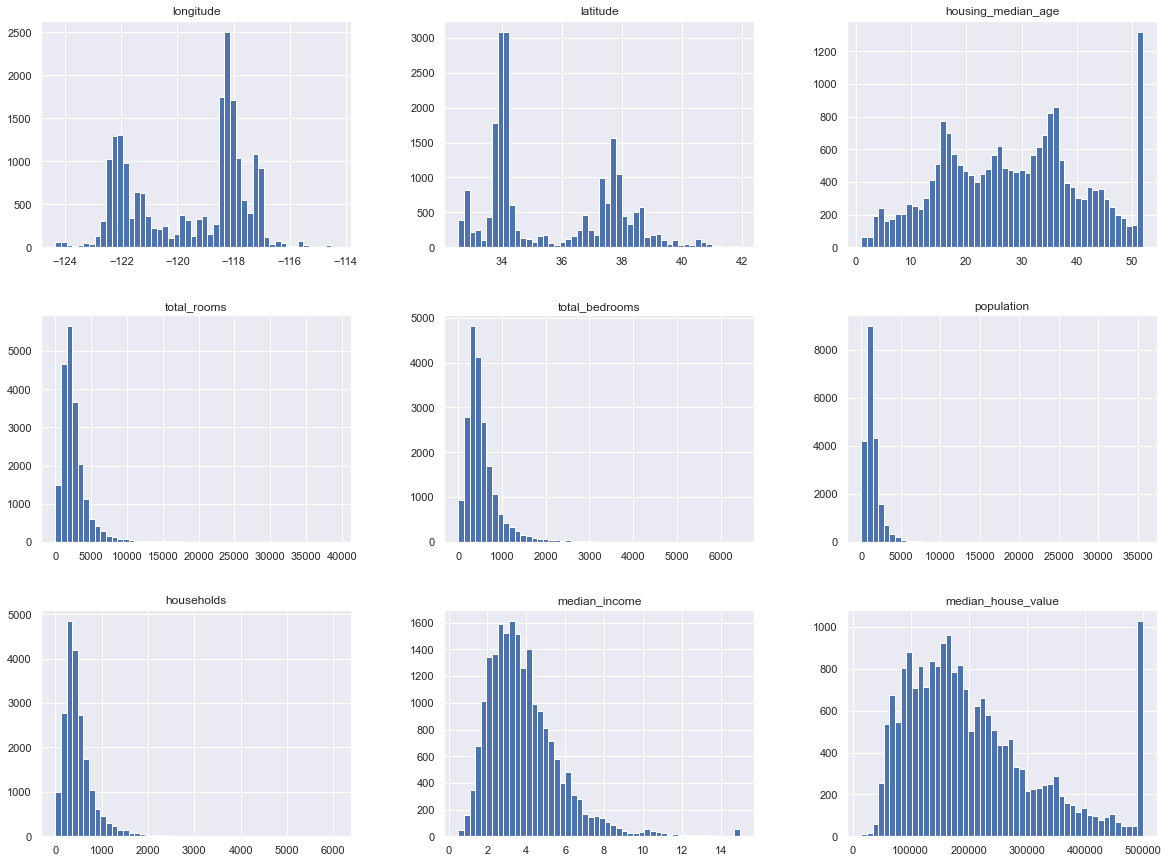

In [16]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [17]:
# custom function to perform train_test split

def train_test_split(data,test_ratio):
    reshuffled_indices=np.random.permutation(len(data))
    test_size=int(len(data)*test_ratio)
    test_indices=reshuffled_indices[:test_size]
    train_indices=reshuffled_indices[test_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [18]:
# creating income categories
housing['income_cat']=np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5,5.0,inplace=True) #replaces the value only when the condition is false

In [19]:
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [20]:
train,test=train_test_split(housing,0.2)

In [21]:
#stratified sampling on income
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(housing,housing['income_cat']):
    stratified_train=housing.loc[train_index]
    stratified_test=housing.loc[test_index]

In [23]:
len(stratified_train)

16512

In [24]:
len(stratified_test)

4128

Stratified sampling removes sampling bias i.e makes sure both train and test sets are true representation of the original dataset.

It should be performed on a given feature whose distribution is essential to the model. This information will be given by domain experts. 

In [25]:
# removing the income_cat column:
for i in (stratified_train,stratified_test):
    i.drop(['income_cat'], axis=1,inplace=True)

In [26]:
stratified_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [27]:
stratified_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [28]:
housing=stratified_train.copy()

#### Exploring the Data

In [29]:
import warnings as w
w.filterwarnings('ignore')

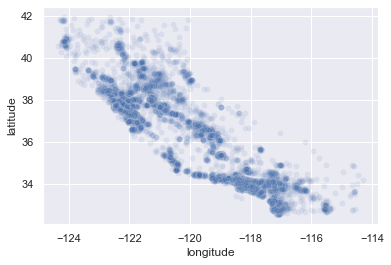

In [30]:
#Geographical data visualiza


sns.scatterplot(y=housing['latitude'],x=housing['longitude'],alpha=0.1)
plt.show()

The deep blue color represents the hig dense areas

#### visualizing prices



The radius of each circle represents the district’s population (option s), and the color represents the price
(option c). We will use a predefined color map (option cmap) called jet, which
ranges from blue (low values) to red (high prices):

<Figure size 720x720 with 0 Axes>

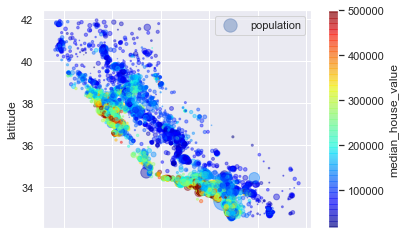

In [31]:
plt.figure(figsize=(10,10))
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing['population']/100,label='population',c='median_house_value',cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()
plt.show()

#### Looking for Correlations

In [32]:
corr_matrix=housing.corr()

In [33]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [34]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

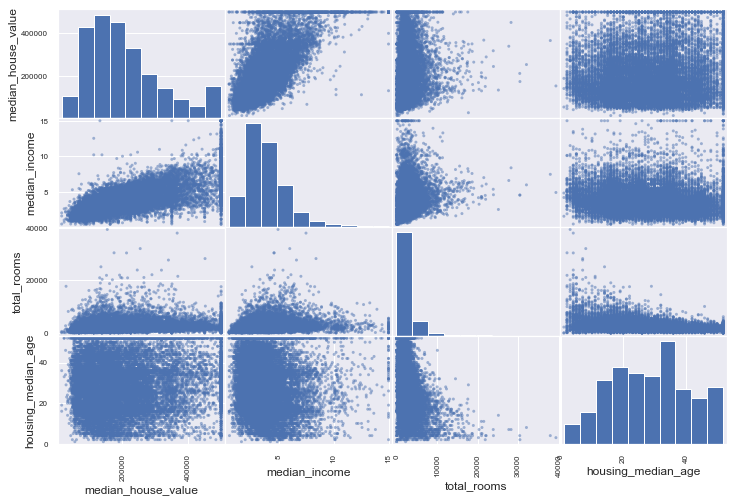

In [35]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value", "median_income", "total_rooms",
"housing_median_age"]

scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

clearly the median_income seems to be the most strong attribute to predict house prices

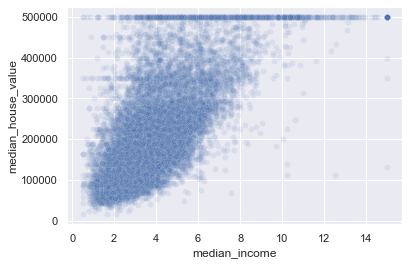

In [36]:
sns.scatterplot(y=housing['median_house_value'],x=housing['median_income'],alpha=0.1,)
plt.show()

In [37]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']


In [38]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  rooms_per_household       16512 non-null  float64
 11  bedrooms_per_room         16354 non-null  float64
 12  population_per_household  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [39]:
corr_matrix=housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### Preparig the data for machine learning model

In [40]:
housing=stratified_train.drop(['median_house_value'],axis=1)

In [41]:
housing_labels=stratified_train['median_house_value'].copy()

In [42]:
len(housing_labels)

16512

In [43]:
len(housing)

16512

In [44]:
from sklearn.impute import SimpleImputer

In [45]:
imputer=SimpleImputer(strategy='median')

In [46]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [47]:
housing_num=housing.drop(['ocean_proximity'],axis=1)

In [48]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [49]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [50]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [51]:
housing_num['total_bedrooms'].median()

433.0

In [52]:
X=imputer.transform(housing_num)

In [53]:
# getting it back to a DataFrame
housing_tr=pd.DataFrame(X,columns=housing_num.columns)


### Categorical Variables

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
encoder=LabelEncoder()
housing_cat=housing['ocean_proximity']
housing_cat_encoded=encoder.fit_transform(housing_cat)

In [56]:
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [57]:
housing_cat_encoded.shape

(16512,)

In [58]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [59]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

# OR 

In [60]:
from sklearn.preprocessing import LabelBinarizer

encoder=LabelBinarizer()
housing_cat_1hot=encoder.fit_transform(housing['ocean_proximity'])
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

## Custom Transformers

In [61]:
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix=3, 4, 5, 6

In [62]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):# in the __init__ function you define the **args, **kargs
        self.add_bedrooms_per_room=add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self                # the fit method returns nothing
    
    def transform(self, X, y=None):  # the tranformation logic falls inside the transform method
        rooms_per_household = X[:, rooms_ix]/X[:, household_ix]
        population_per_household = X[:, population_ix]/X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X,rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [63]:
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=True)

housing_extra_attribs=attr_adder.transform(housing.values)

In [64]:
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., 4.625368731563422, 2.094395280235988,
        0.22385204081632654],
       [-121.93, 37.05, 14.0, ..., 6.008849557522124, 2.7079646017699117,
        0.15905743740795286],
       [-117.2, 32.77, 31.0, ..., 4.225108225108225, 2.0259740259740258,
        0.24129098360655737],
       ...,
       [-116.4, 34.09, 9.0, ..., 6.34640522875817, 2.742483660130719,
        0.1796086508753862],
       [-118.01, 33.82, 31.0, ..., 5.50561797752809, 3.808988764044944,
        0.19387755102040816],
       [-122.45, 37.77, 52.0, ..., 4.843505477308295, 1.9859154929577465,
        0.22035541195476574]], dtype=object)

### Tranformations Pipelines

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [66]:
'''pipeline to transform an array by:
first imputing missing values with median, 
adding attributes using the custom tranformer defined above
scaling the features using the the standardscaler'''

num_pipeline=Pipeline([
('imputer',SimpleImputer(strategy='median')),
('attribs_adder',CombinedAttributesAdder()),
('std_scaler',StandardScaler()),
])

In [67]:
housing_num_tr=num_pipeline.fit_transform(housing_num)

In [68]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

##### Notes

In pipelining, the output of the previous transformation serves as the input to the next transformation. Thus order is much important.
For example:

In the above pipeline the imputer tranformation outputs an array which is in turn taken as input by the CombinedttributesAdder class. This order is important otherwise it won't work as desired

#### Joining Multiple Pipelines

now that we have a pipeline for the numerical values, we also need one for the categorical variables.

In [69]:
from sklearn.pipeline import FeatureUnion

In [70]:
# to be used in the next cell to select either numericals or categorical columns

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names].values
        
        

In [71]:

num_attribs=list(housing_num) # this gets the columns/attributes of the dataframe housing_num
cat_attribs=['ocean_proximity'] # this the category column

num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

cat_pipeline=Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('one_hot_encoder',OneHotEncoder(sparse=False)),
])

full_pipeline=FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

In [72]:
housing_prepared=full_pipeline.fit_transform(housing)

### Selecting and Training a Model

In [73]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [74]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

In [75]:
# preparing the data
some_data_prepared=full_pipeline.transform(X=some_data)

In [76]:
print("Predictions on the data:\t", lin_reg.predict(some_data_prepared))
print("\nActual Labels:\t\t\t",list(some_labels))

Predictions on the data:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]

Actual Labels:			 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


#### Measuring ```RMSE``` for this Prediction Model

In [77]:
from sklearn.metrics import mean_squared_error

housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels, housing_predictions)
lin_rmse=np.sqrt(lin_mse)
print("The MSE is: ",lin_mse)
print("The RMSE is: ", lin_rmse)

The MSE is:  4709829587.97112
The RMSE is:  68628.19819848922


the model is underfitting the data; we therefore need to either add more features, get a more powerful algorithm, or if regularized tune the hyperparameters.

#### Getting a more complex Algorithm

In [78]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()

tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [79]:
housing_predictions=tree_reg.predict(housing_prepared)

tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)

print("The MSE is:\t", tree_mse)
print("The RMSE is:\t", tree_rmse)

The MSE is:	 0.0
The RMSE is:	 0.0


No error at all!! how?

## Better Evaluation Using Cross-Validation

In [80]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [81]:
rmse_scores=np.sqrt(-scores)

In [82]:
rmse_scores

array([68181.9954367 , 66680.53975579, 71115.58697641, 69839.18197014,
       70776.65548756, 74410.91018131, 71875.74853889, 70624.36785034,
       76921.78731559, 70065.08382882])

In [83]:
rmse_scores.mean()

71049.18573415428

Now the Model performs worse than even the Linear Regression Model.

In [84]:
# Training the Linear Regression on cross_validation

lin_scores=cross_val_score(lin_reg, housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

lin_rmse_scores=np.sqrt(-lin_scores)

In [85]:
lin_rmse_scores.mean()

69052.46136345083

In [86]:
lin_rmse_scores.std()

2731.674001798347

That’s right: the Decision Tree model is overfitting so badly that it performs
worse than the Linear Regression model.

#### Let’s try one last model now: the RandomForestRegressor.

Random Forests work by training many Decision Trees on random
subsets of the features, then averaging out their predictions.

In [87]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_mse=mean_squared_error(housing_labels,forest_reg.predict(housing_prepared))
forest_rmse=np.sqrt(forest_mse)
forest_rmse

18721.58814577253

 using cross Validation

In [88]:
forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

forest_rmse_scores=np.sqrt(-forest_scores)

forest_rmse_scores.mean()

50327.956434395266

## Saving and loading a Model

In [89]:
import joblib

In [90]:

joblib.dump(forest_reg, "forest_reg.pkl")
# and later...
my_model_loaded = joblib.load("forest_reg.pkl")

In [91]:
my_model_loaded.predict(housing_prepared)

array([266026.  , 333014.02, 213739.  , ..., 103170.  , 210896.  ,
       458665.69])

# Fine-Tune Your Model

# `````GridSearch`````

###### 1. for RandomForestRegressor

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, scoring = 'neg_mean_squared_error', cv = 5)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [94]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [95]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

#### Analyze the Best Models and Their Errors

In [96]:
feature_importances=grid_search.best_estimator_.feature_importances_

feature_importances

array([7.03331172e-02, 6.29834751e-02, 4.35798276e-02, 1.52203869e-02,
       1.48644266e-02, 1.48490365e-02, 1.48269302e-02, 3.54124615e-01,
       5.89580074e-02, 1.13248409e-01, 5.91502324e-02, 6.28410588e-03,
       1.66714547e-01, 6.57760153e-05, 1.98059437e-03, 2.81651300e-03])

In [97]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)

attribs = num_attribs + extra_attribs + cat_one_hot_attribs

In [98]:
print(len(feature_importances))
print(len(attribs))

16
16


In [99]:
sorted(zip(feature_importances,attribs), reverse = True)

[(0.3541246147338838, 'median_income'),
 (0.16671454696566565, 'INLAND'),
 (0.11324840914208611, 'pop_per_hhold'),
 (0.0703331172081025, 'longitude'),
 (0.06298347512821109, 'latitude'),
 (0.059150232361734514, 'bedrooms_per_room'),
 (0.058958007417507716, 'rooms_per_hhold'),
 (0.04357982757182963, 'housing_median_age'),
 (0.015220386890106755, 'total_rooms'),
 (0.014864426607820284, 'total_bedrooms'),
 (0.014849036519665867, 'population'),
 (0.014826930193918697, 'households'),
 (0.006284105879225781, '<1H OCEAN'),
 (0.0028165129987589264, 'NEAR OCEAN'),
 (0.001980594366230523, 'NEAR BAY'),
 (6.577601525231057e-05, 'ISLAND')]

With this information, you may want to try dropping some of the less useful
features (e.g., apparently only one ocean_proximity category is really useful, so
you could try dropping the others).

# Evaluate Your System on the Test Set

In [100]:
final_model = grid_search.best_estimator_

X_test = stratified_test.drop(['median_house_value'], axis=1)
y_test=stratified_test['median_house_value'].copy()

X_test_prepared=full_pipeline.transform(X_test)

final_predictions=final_model.predict(X_test_prepared)



In [101]:
final_mse=mean_squared_error(y_test, final_predictions)
final_rmse=np.sqrt(final_mse)

print("The MSE is: ", final_mse)
print(f"The RMSE is: {final_rmse}")

The MSE is:  2263859662.5642457
The RMSE is: 47580.03428502596


The performance will usually be slightly worse than what you measured using
cross-validation if you did a lot of hyperparameter tuning (because your system
ends up fine-tuned to perform well on the validation data, and will likely not
perform as well on unknown datasets). It is not the case in this example, but
when this happens you must resist the temptation to tweak the hyperparameters
to make the numbers look good on the test set; the improvements would be
unlikely to generalize to new data.